# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




### Question 1 - Feature Engineering (5 points)

In this step you outline the following as potential features (this is a limited example - we can have many features as in your programming exercise below). 

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1| \mathbf{x}, \mathbf w)=\frac{p(x | y=1)p(y=1)}{p(x | y=1)p(y=1)+p(x|y=0)p(y=0)} = \frac{1}{1+e^{-\alpha}}=\sigma(\alpha)$$ 

$$p(y=0| \mathbf{x}, \mathbf w)=1-\frac{p(x | y=1)p(y=1)}{p(x | y=1)p(y=1)+p(x|y=0)p(y=0)} = 1-\sigma(\alpha)$$

the equeation for alpha is shown below. $$\alpha=ln\frac{p(x|y=1)p(y=1)}{p(x|y=0)p(y=0)}$$



### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.





The decision boundary should be the intersection of the probability mass functions, so as to minimize false positives and false negatives. this can be written via the following equality:

$$p(y=1|x,w)=p(y=0|x,w)$$

which can also be written as the following:

$$\sigma(\alpha)=1-\sigma(\alpha)$$

visually, the decision boundary should sit at the intersection of the sigmoid line and the inverse simga line, representing the conditions where there is an equal probability that y=1 and y=0.



### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



$$L_{CE} = -\Sigma^m_{i=1}[y_i\ln(σ(w^Τx_i))+(1-y_i)\ln(1-\sigma(w^Τx_i)] $$


### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



$$ \nabla_\mathbf w L_{CE} =\Sigma^m_{i=1}[(σ(w^Τx_i)-y_i)x_i]$$

### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



If the p(y=0) is much larger than p(y=1), this will lead to the regression being much more likely to return ŷ=0. This will lead to a higher rate of false negatives, thereby effecting the accuracy of the Logisitic Regression. The model will have a low rate of false positives, however, as it will be much less likely to predict a positive in the first place. 


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



w vector:  [[-1.84834009e-03 -4.54038579e-03  7.88831514e-06  1.83512257e-03
   3.41803018e-03 -2.00747551e-03 -3.22278484e-03  1.61564091e-04]]


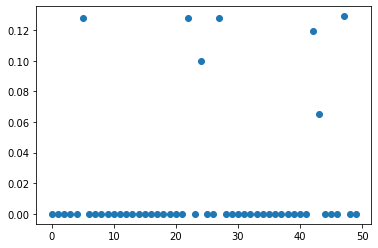

In [99]:
from numpy.core.fromnumeric import size
# write your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

data=pd.read_csv("./CBC_data.csv").dropna()
y=data[["PARASITE_STATUS"]].values
X=data[["RBC","HGB","WBC","EOS.CNT","MONO.CNT","NUT.CNT","PL.CNT","LYMP.CNT"]]

n_epochs=50
eta=3*10**-7
ones=[1,1,1,1,1,1,1,1]
w=np.matrix(np.zeros(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

m=y_train.size

def sig_fun(w, X):
  output = 1.0/(1 + np.exp(-np.dot(w,X.T)))
  #print(np.exp(-np.dot(w,X.T)),"  -  ",w,X.T)
  return   output


def grad_fun(w,X,y):
  #print(np.dot((sig_fun(w,X)-y),X))
  return np.dot((sig_fun(w,X)-y),X)

def pred_values(w, X):
    probabilities = sig_fun(w, X)
    pred_value = np.where(probabilities >= .5, 1, 0) 
    return np.squeeze(pred_value)

def f1_score(X_test,y_test,w):
  predictions = pred_values(w,X_test)
  fp=0;tp=0;fn=0
  for i in range(y_test.size):
    yi=1 if (y_train[i])==("Positive") else 0
    #print(yi,predictions[i])
    if(yi==1):
      if(predictions[i]==1):
        tp+=1
      else:
        fn+=1
    else:
      if(predictions[i]==1):
        fp+=1   
  #print(fp,fn,tp)
  if(tp==0):
    return 0
  recall=tp/(tp+fn)
  percision=tp/(tp+fp)
  return 2/(percision**-1+recall**-1)


iteration_number=[]
F_score_v_iteration=[]


for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=X_train[random_index:random_index+1].values
    #if(type(np.dot(ones,xi.T)[0])!=type(1)):
    #  continue
    #print(xi)
    yi=1 if (y_train[random_index:random_index+1][0])==("Positive") else 0
    gradients=grad_fun(w,xi,yi)
    w=w-eta*gradients
  iteration_number.append(epoch)
  F_score_v_iteration.append(f1_score(X_test,y_test,w))
    #print(w,gradients)
    #print(yi,(y_train[random_index:random_index+1][0]))

print("w vector: ",w)
plt.scatter(iteration_number,F_score_v_iteration)


Most of the items in the data set are cases where the animal did not have a parasite. This means that the combined probability of an animal having a parasite, which was our positive case, is very low. Our model does not handle this very well, and tends to always predict no parasite. In this case, when the number of true positives is 0, we set the f1 score equal to zero to avoid a division by zero error during the runtime. This is shown on the graph above.